In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (datasets, naive_bayes, neighbors, neural_network, model_selection, svm)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
x_train = np.reshape(x_train, (len(x_train), 32*32*3))
x_test = np.reshape(x_test, (len(x_test), 32*32*3))

print(np.shape(x_train))
print(np.shape(x_test))

(50000, 3072)
(10000, 3072)


In [4]:
(S_train, S_val, S_trainY, S_valY)=model_selection.train_test_split(x_train, y_train, test_size=.2)

print("Dimensions of the training set X data : ", S_train.shape,"\n")
print("Dimensions of the testing set X data : ", S_val.shape,"\n")

Dimensions of the training set X data :  (40000, 3072) 

Dimensions of the testing set X data :  (10000, 3072) 



### Saving x and y data:

In [4]:
np.savetxt('x_test.txt',x_test, delimiter=",") 
np.savetxt('y_test.txt',y_test, delimiter=",") 

In [7]:
x_train.shape

(50000, 3072)

In [57]:
np.savetxt('x_train.txt',x_train, delimiter=",") 

np.savetxt('x_test.txt',x_test, delimiter=",") 

np.savetxt('y_train.txt',y_train, delimiter=",") 

np.savetxt('y_test.txt',y_test, delimiter=",") 

### Saving S_train and S_val data

In [5]:
np.savetxt('S_train.txt',S_train, delimiter=",") 

np.savetxt('S_val.txt',S_val, delimiter=",") 

np.savetxt('S_trainY.txt',S_trainY, delimiter=",") 

np.savetxt('S_valY.txt',S_valY, delimiter=",") 

### How to load data:

In [ ]:
test = "C:\\Users\\jakes\\S_val.txt"
D = np.loadtxt(test, delimiter=',')
[N,dim]=np.shape(D)
print(N)

# Model 1:

In [25]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [26]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history = model1.fit(S_train, S_trainY, epochs=10, validation_data = (S_val, S_valY))

Epoch 1/10
1250/1250 [==============================] - 16s 12ms/step - loss: 11.5157 - accuracy: 0.2203 - val_loss: 2.1019 - val_accuracy: 0.2870
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 2.1329 - accuracy: 0.2698 - val_loss: 2.1856 - val_accuracy: 0.2500
Epoch 3/10
1250/1250 [==============================] - 14s 11ms/step - loss: 2.2068 - accuracy: 0.1877 - val_loss: 2.1131 - val_accuracy: 0.1823
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 2.2498 - accuracy: 0.1303 - val_loss: 2.3045 - val_accuracy: 0.0970
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3032 - accuracy: 0.1009 - val_loss: 2.3055 - val_accuracy: 0.0973
Epoch 6/10
1250/1250 [==============================] - 18s 15ms/step - loss: 2.3031 - accuracy: 0.1003 - val_loss: 2.3029 - val_accuracy: 0.0989
Epoch 7/10
1250/1250 [==============================] - 13s 11ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3028 

In [28]:
model1acc = history.history['accuracy']
model1valAcc = history.history['val_accuracy']
model1valLoss = history.history['val_loss']

test_loss, test_acc, = model1.evaluate(S_val, S_valY, verbose=2)

print('\nTest accuracy for model 1:', test_acc)

313/313 - 2s - loss: 2.3029 - accuracy: 0.1002 - 2s/epoch - 5ms/step

Test accuracy for model 1: 0.10019999742507935


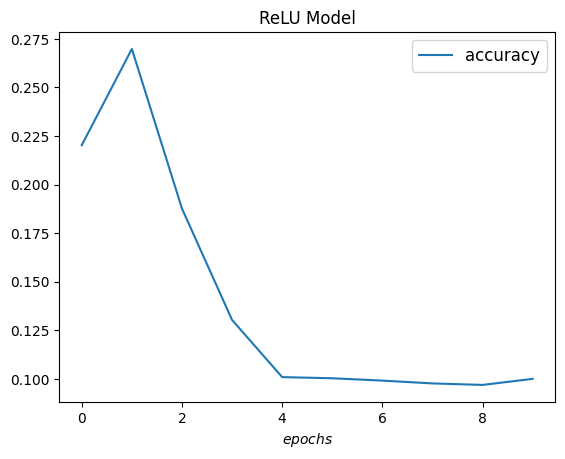

In [29]:
f, ax=plt.subplots()
ax.title.set_text("ReLU Model")
ax.plot(history.history['accuracy'], label="accuracy")
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

# Model 2:

In [30]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [31]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
history = model2.fit(S_train, S_trainY, epochs=10, validation_data = (S_val, S_valY))

Epoch 1/10
1250/1250 [==============================] - 18s 12ms/step - loss: 6.6860 - accuracy: 0.2295 - val_loss: 2.0884 - val_accuracy: 0.2729
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 2.0090 - accuracy: 0.3003 - val_loss: 1.9233 - val_accuracy: 0.3084
Epoch 3/10
1250/1250 [==============================] - 18s 15ms/step - loss: 1.9435 - accuracy: 0.3143 - val_loss: 1.9652 - val_accuracy: 0.2764
Epoch 4/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.8949 - accuracy: 0.3186 - val_loss: 1.8395 - val_accuracy: 0.3324
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8850 - accuracy: 0.3210 - val_loss: 1.9299 - val_accuracy: 0.2973
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8404 - accuracy: 0.3362 - val_loss: 1.8533 - val_accuracy: 0.3326
Epoch 7/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8042 - accuracy: 0.3533 - val_loss: 1.7910 -

In [33]:
model2acc = history.history['accuracy']
model2valAcc = history.history['val_accuracy']
model2valLoss = history.history['val_loss']

test_loss, test_acc = model2.evaluate(S_val, S_valY, verbose=2)
print('\nTest accuracy for model 2:', test_acc)

313/313 - 2s - loss: 1.7420 - accuracy: 0.3813 - 2s/epoch - 5ms/step

Test accuracy for model 2: 0.3813000023365021


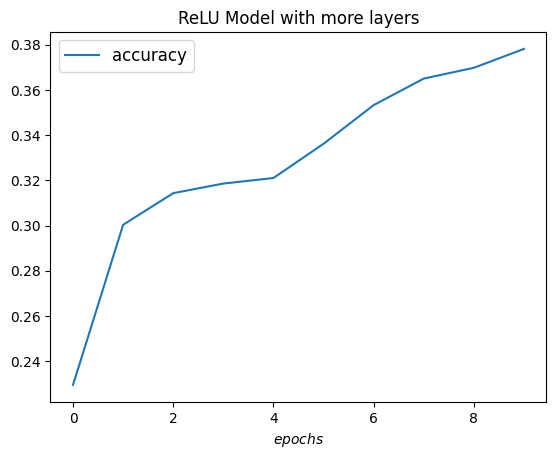

In [34]:
f, ax=plt.subplots()
ax.title.set_text("ReLU Model with more layers")
ax.plot(history.history['accuracy'], label="accuracy")
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

# Model 3:

In [35]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=192, activation='tanh'),
    tf.keras.layers.Dense(units=128, activation='tanh'),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history = model3.fit(S_train, S_trainY, epochs=10, validation_data = (S_val, S_valY))

Epoch 1/10
1250/1250 [==============================] - 14s 10ms/step - loss: 2.3156 - accuracy: 0.0983 - val_loss: 2.3059 - val_accuracy: 0.1022
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3118 - accuracy: 0.0990 - val_loss: 2.3163 - val_accuracy: 0.1019
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3110 - accuracy: 0.0987 - val_loss: 2.3081 - val_accuracy: 0.1019
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3112 - accuracy: 0.0979 - val_loss: 2.3130 - val_accuracy: 0.0995
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3108 - accuracy: 0.0993 - val_loss: 2.3114 - val_accuracy: 0.1003
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3112 - accuracy: 0.1006 - val_loss: 2.3086 - val_accuracy: 0.1039
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3118 - accuracy: 0.0975 - val_loss: 2.3127 -

In [37]:
model3acc = history.history['accuracy']
model3valAcc = history.history['val_accuracy']
model3valLoss = history.history['val_loss']

test_loss, test_acc = model3.evaluate(S_val, S_valY, verbose=2)
print('\nTest accuracy for model 3:', test_acc)

313/313 - 2s - loss: 2.3061 - accuracy: 0.1002 - 2s/epoch - 5ms/step

Test accuracy for model 3: 0.10019999742507935


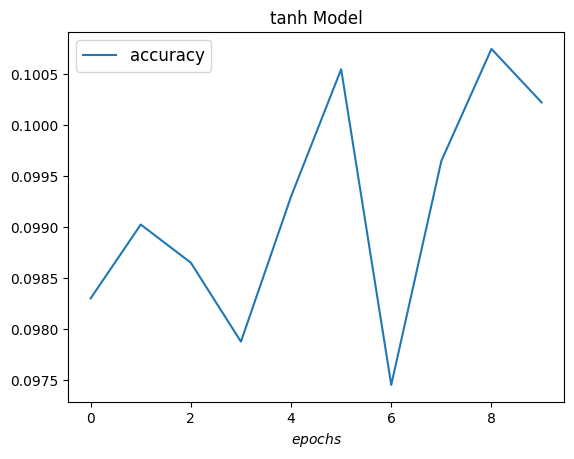

In [38]:
f, ax=plt.subplots()
ax.title.set_text("tanh Model")
ax.plot(history.history['accuracy'], label="accuracy")
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

# Model 4

In [39]:
# Reshaping the data for the convolutional model, saving into new variables

S_trainR = S_train
S_valR = S_val

S_trainR = np.reshape(S_train, (len(S_train), 32,32,3))
S_valR = np.reshape(S_val, (len(S_val), 32,32,3))

#print(S_trainR.shape)
#print(S_trainR.shape)
#print(S_trainY.shape)
#print(S_valY.shape)

In [40]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

In [41]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model4.fit(S_trainR, S_trainY, epochs=10, validation_data = (S_valR, S_valY))
#                    validation_data=(S_valR, S_valY))

Epoch 1/10
1250/1250 [==============================] - 37s 28ms/step - loss: 1.6646 - accuracy: 0.4219 - val_loss: 1.3671 - val_accuracy: 0.5101
Epoch 2/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2580 - accuracy: 0.5546 - val_loss: 1.3401 - val_accuracy: 0.5429
Epoch 3/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.1084 - accuracy: 0.6115 - val_loss: 1.0885 - val_accuracy: 0.6198
Epoch 4/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9954 - accuracy: 0.6541 - val_loss: 1.0501 - val_accuracy: 0.6407
Epoch 5/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9163 - accuracy: 0.6833 - val_loss: 1.0681 - val_accuracy: 0.6338
Epoch 6/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8387 - accuracy: 0.7091 - val_loss: 1.0573 - val_accuracy: 0.6539
Epoch 7/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.7766 - accuracy: 0.7341 - val_loss: 1.0485 -

In [42]:
model4acc = history.history['accuracy']
model4valAcc = history.history['val_accuracy']
model4valLoss = history.history['val_loss']

test_loss, test_acc = model4.evaluate(S_valR, S_valY, verbose=2)
print('\nTest accuracy for model 4:', test_acc)

313/313 - 3s - loss: 1.0669 - accuracy: 0.6750 - 3s/epoch - 10ms/step

Test accuracy for model 4: 0.675000011920929


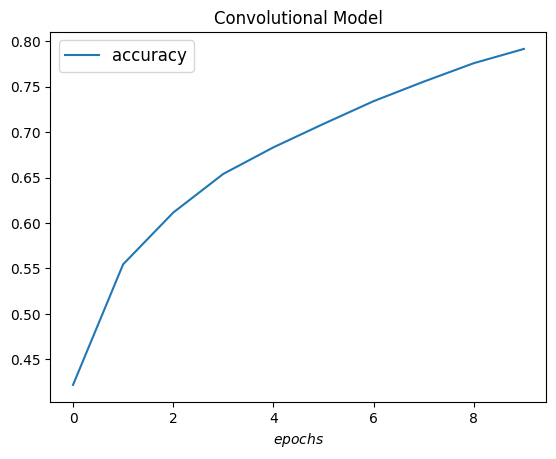

In [43]:
f, ax=plt.subplots()
ax.title.set_text("Convolutional Model")
ax.plot(history.history['accuracy'], label="accuracy")
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

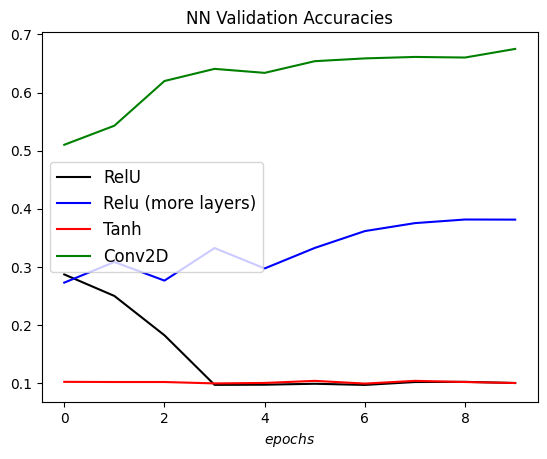

In [45]:
f, ax=plt.subplots()
ax.title.set_text("NN Validation Accuracies")
ax.plot(model1valAcc, label="RelU", color='k')
ax.plot(model2valAcc, label="Relu (more layers)", color='b')
ax.plot(model3valAcc, label="Tanh", color='r')
ax.plot(model4valAcc, label="Conv2D", color='g')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)